### Example 1: Van der Pol

---

The Van der Pol equation was proposed in 1928 to model oscillations in the heart. It is a secondorder nonlinear differential equation in one variable:
$$
\frac{d^2 y}{d t^2}-\mu\left(1-y^2\right) \frac{d y}{d t}+y=0
$$
To write this as a set of first order ODEs, we let $\mathrm{z}=\mathrm{dy} / \mathrm{dt}$ to get:
$$
\begin{gathered}
\frac{d y}{d t}=z \\
\frac{d z}{d t}=\mu\left(1-y^2\right) z-y
\end{gathered}
$$

In [1]:
import sys
sys.path.append("../DQbee/")
from Simulation import *
from DQbee import *
from qbee import *
import sympy as sp
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

------------------- Import Dqbee -------------------
---------- Dqbee Module loaded successfully ----------


/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/qbee/util.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
y, z = sp.symbols("y z")
mu = sp.Symbol("mu")

system = [
    sp.Eq(y, z),
    sp.Eq(z, mu * (1 - y ** 2) * z - y)
]

symbolic_args={mu: 1}
initial_state={y: 0.1, z: 0}
eq_system = EquationSystem(system)
state_original = system_to_odeint(eq_system, t=[0, 20, 1000], symbolic_args=symbolic_args, initial_state=initial_state)

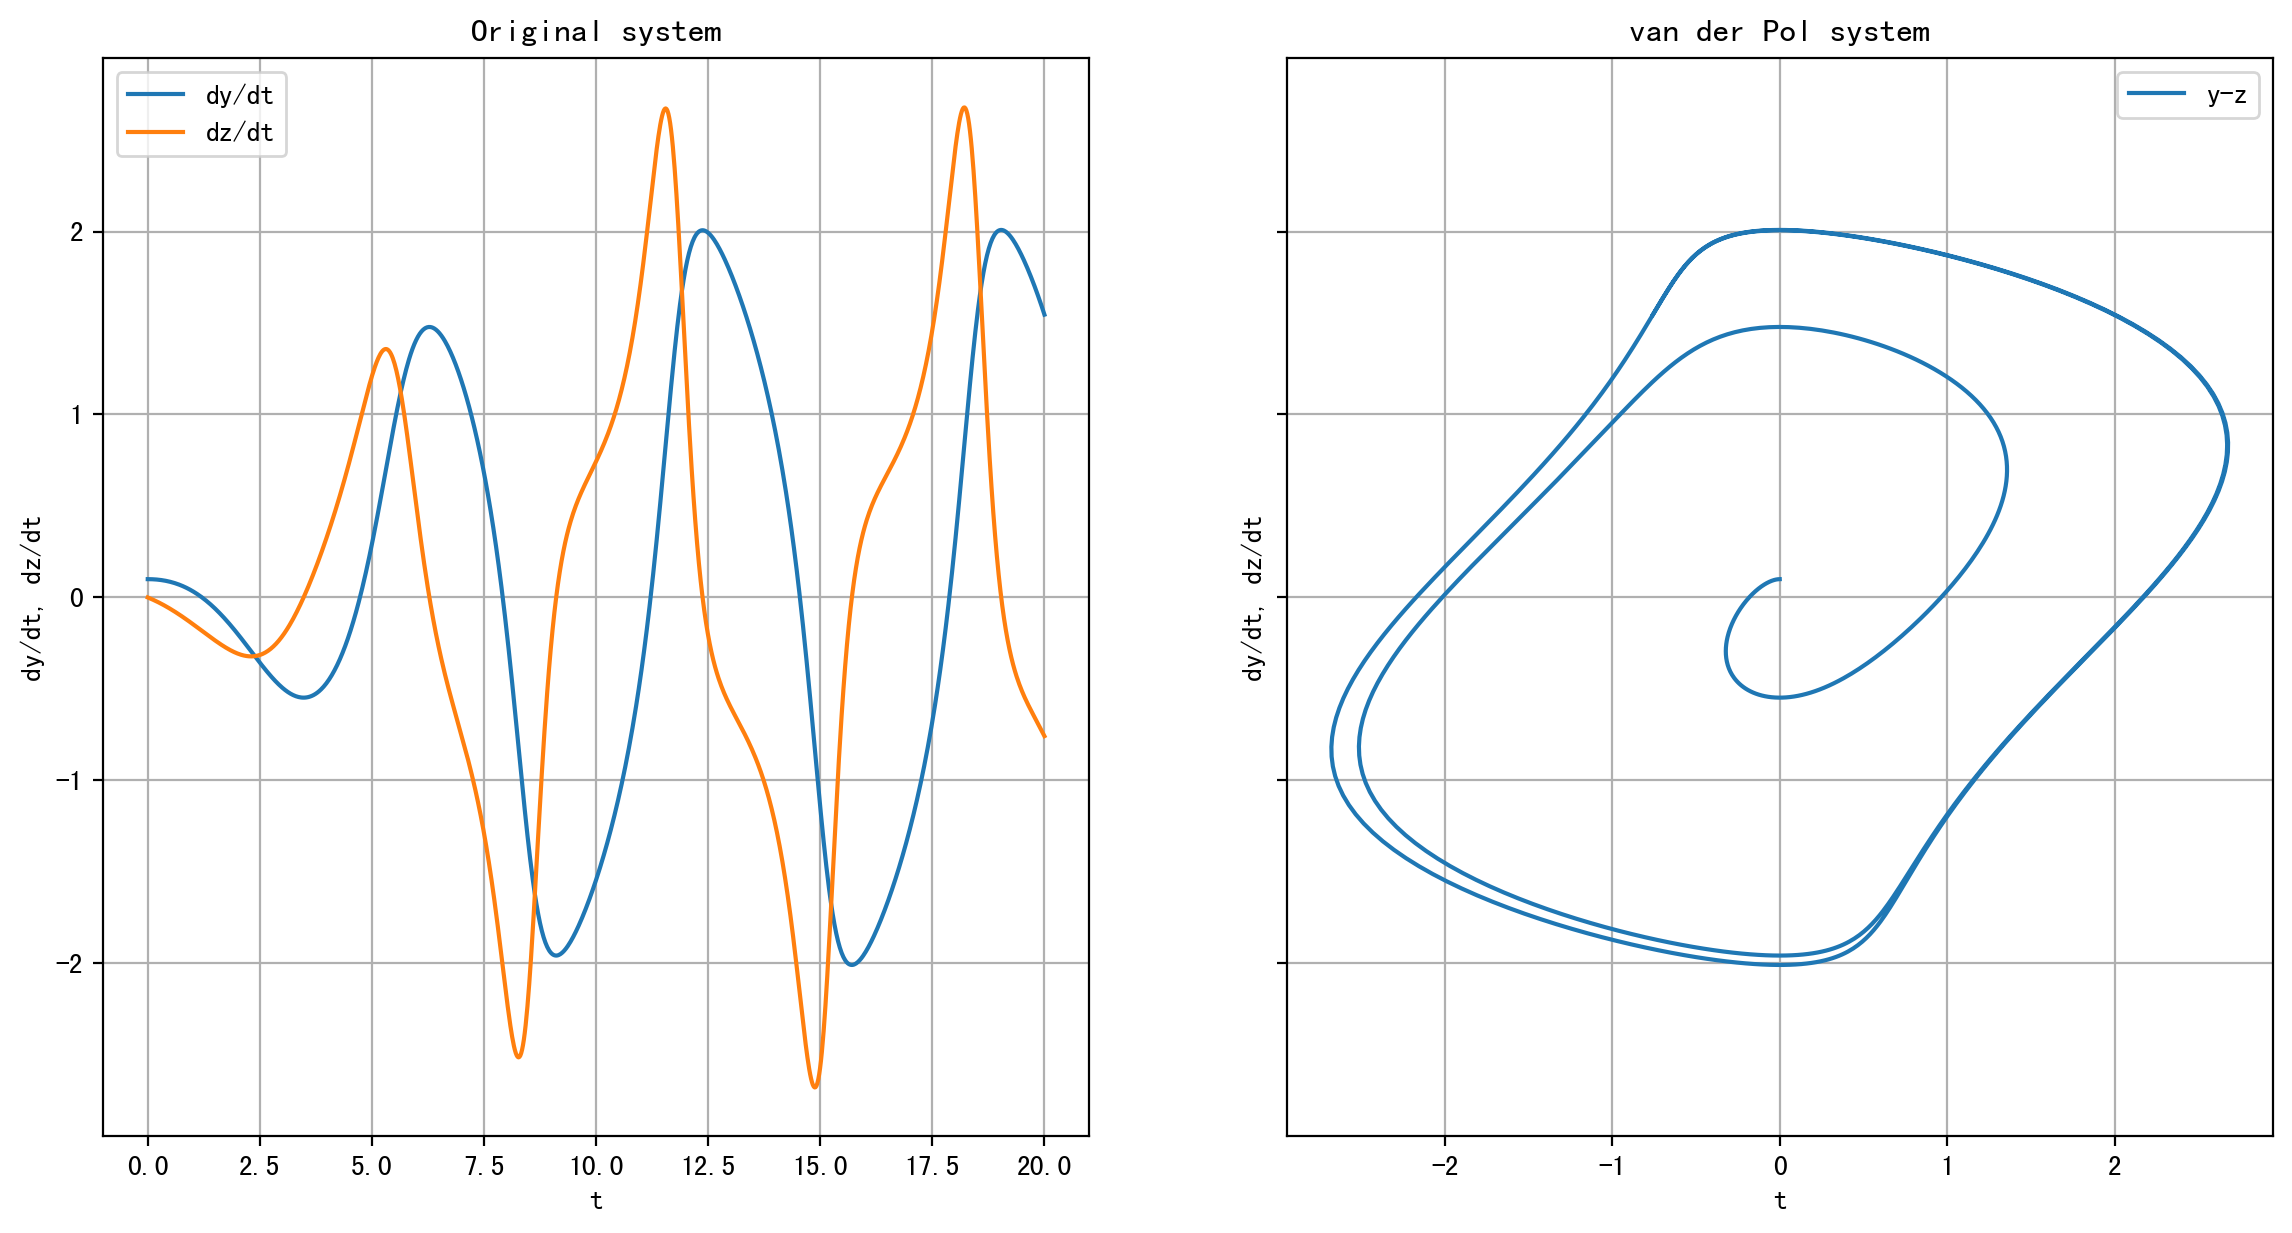

In [3]:
state_ = state_original[0]
variable_index = state_original[1]
t = state_original[2]
y_index, z_index = variable_index.index(y), variable_index.index(z)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
ax1.set_title("Original system")
ax1.plot(t, state_[:, y_index], label="dy/dt")
ax1.plot(t, state_[:, z_index], label="dz/dt")
ax1.legend(loc='best')
ax1.set_xlabel("t")
ax1.set_ylabel("dy/dt, dz/dt")
ax1.grid()

ax2.set_title("van der Pol system")
ax2.plot(state_[:, z_index], state_[:, y_index], label="y-z")
ax2.legend(loc='best')
ax2.set_xlabel("t")
ax2.set_ylabel("dy/dt, dz/dt")
ax2.grid()

In [4]:
system = optimal_inner_quadratization(eq_system)
result = optimal_dissipative_quadratization(eq_system, system[1], system[2], system[3], [-3])

The Original System is: 


<IPython.core.display.Latex object>

The Optimal Dissipative Quadratization is: 


<IPython.core.display.Latex object>

The new introduced variables are: 


<IPython.core.display.Latex object>

The Optimal Quadratic Dissipative System is (with substitution): 


<IPython.core.display.Latex object>

------------------------------ Optimal Dissipative Quadratization ------------------------------
The system contains symbolic constants. Therefore, we cannot make sure that the original system is dissipative.
If the system can not jusity which eigenvalue is the largest one due to the symbolic constants, the program will choose the first one as the default value for the largest eigenvalue.
The eigenvalue with the largest real part is (real part):  mu/2 - sqrt((mu - 2)*(mu + 2))/2
The converted Optimal Dissipative Quadratization System is: 


<IPython.core.display.Latex object>

The matrix  associated to the linear part system is:


<IPython.core.display.Latex object>

In [5]:
state_dissipative = system_to_odeint(result[0], t=[0, 20, 1000], symbolic_args=symbolic_args, initial_state=initial_state, map_variables=result[2])

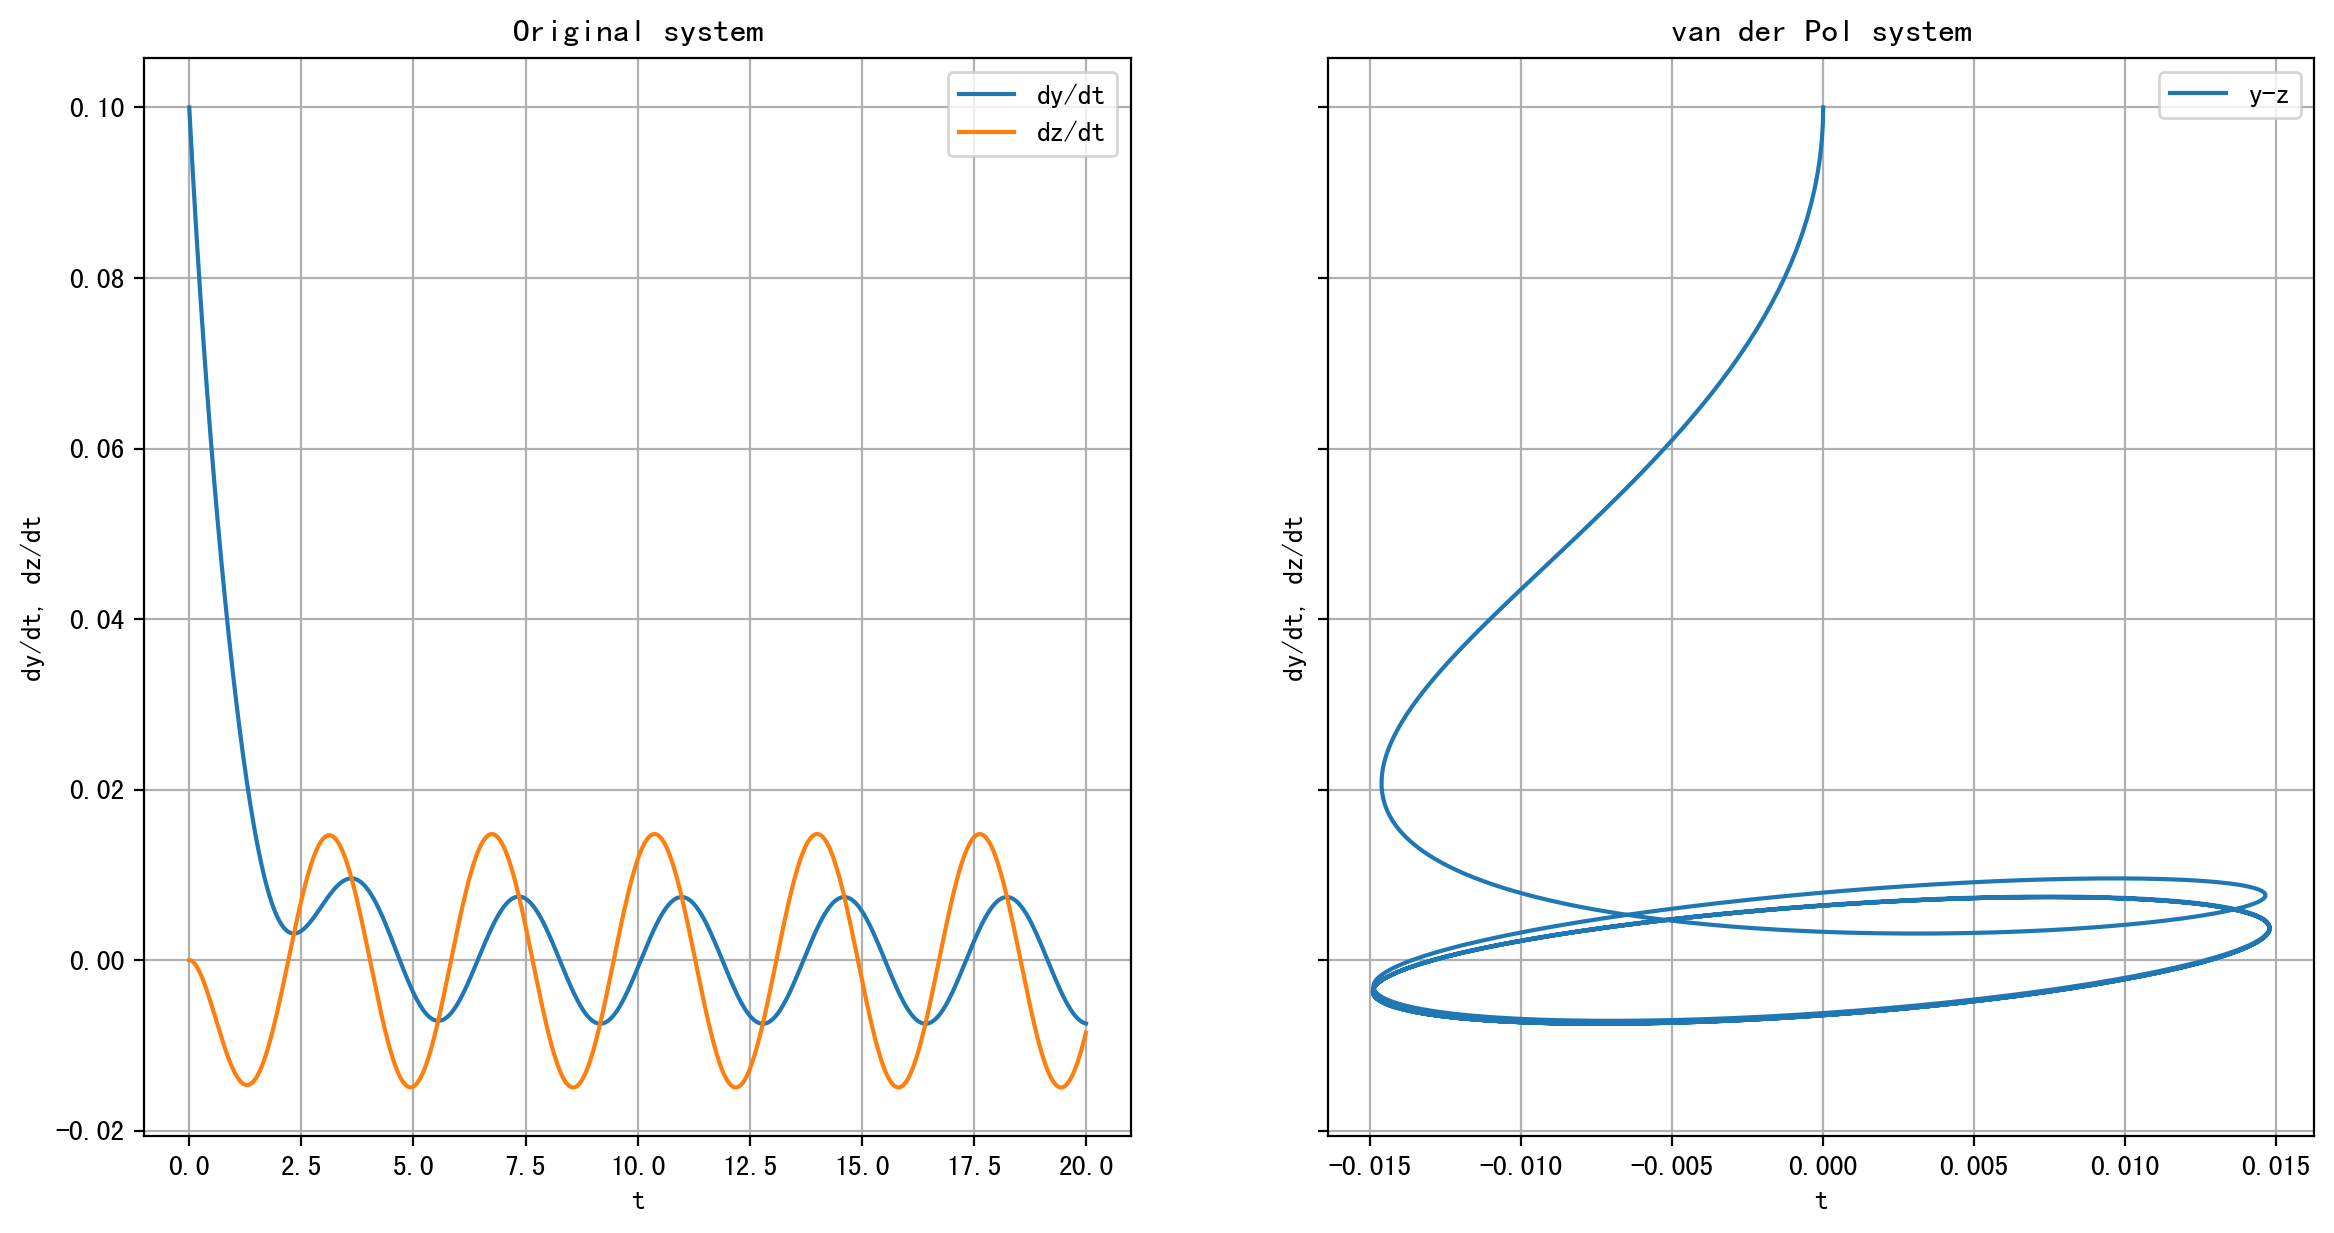

In [6]:
state_ = state_dissipative[0]
variable_index = state_dissipative[1]
t = state_dissipative[2]
y_index, z_index = variable_index.index(y), variable_index.index(z)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
ax1.set_title("Original system")
ax1.plot(t, state_[:, y_index], label="dy/dt")
ax1.plot(t, state_[:, z_index], label="dz/dt")
ax1.legend(loc='best')
ax1.set_xlabel("t")
ax1.set_ylabel("dy/dt, dz/dt")
ax1.grid()

ax2.set_title("van der Pol system")
ax2.plot(state_[:, z_index], state_[:, y_index], label="y-z")
ax2.legend(loc='best')
ax2.set_xlabel("t")
ax2.set_ylabel("dy/dt, dz/dt")
ax2.grid()

### Comparison between dissipative quadratization and monomial quadratization

---

Consider a system of ODEs
$$
\left\{\begin{array}{l}
x^{\prime}=-3 x+1.9 y+x^3 \\
y^{\prime}=-1.9 x+y+y^3
\end{array}\right.
$$

In [7]:
x, y = symbols("x y")

system = [
    sp.Eq(x, -3 * x + 1.9 * y + x ** 3),
    sp.Eq(y, -1.9 * x + y + y ** 3)
]

eq_system = EquationSystem(system)
initial_state={y: 0.5, x: 0.5}
state_original = system_to_odeint(eq_system, t=[0, 20, 1000], initial_state=initial_state)

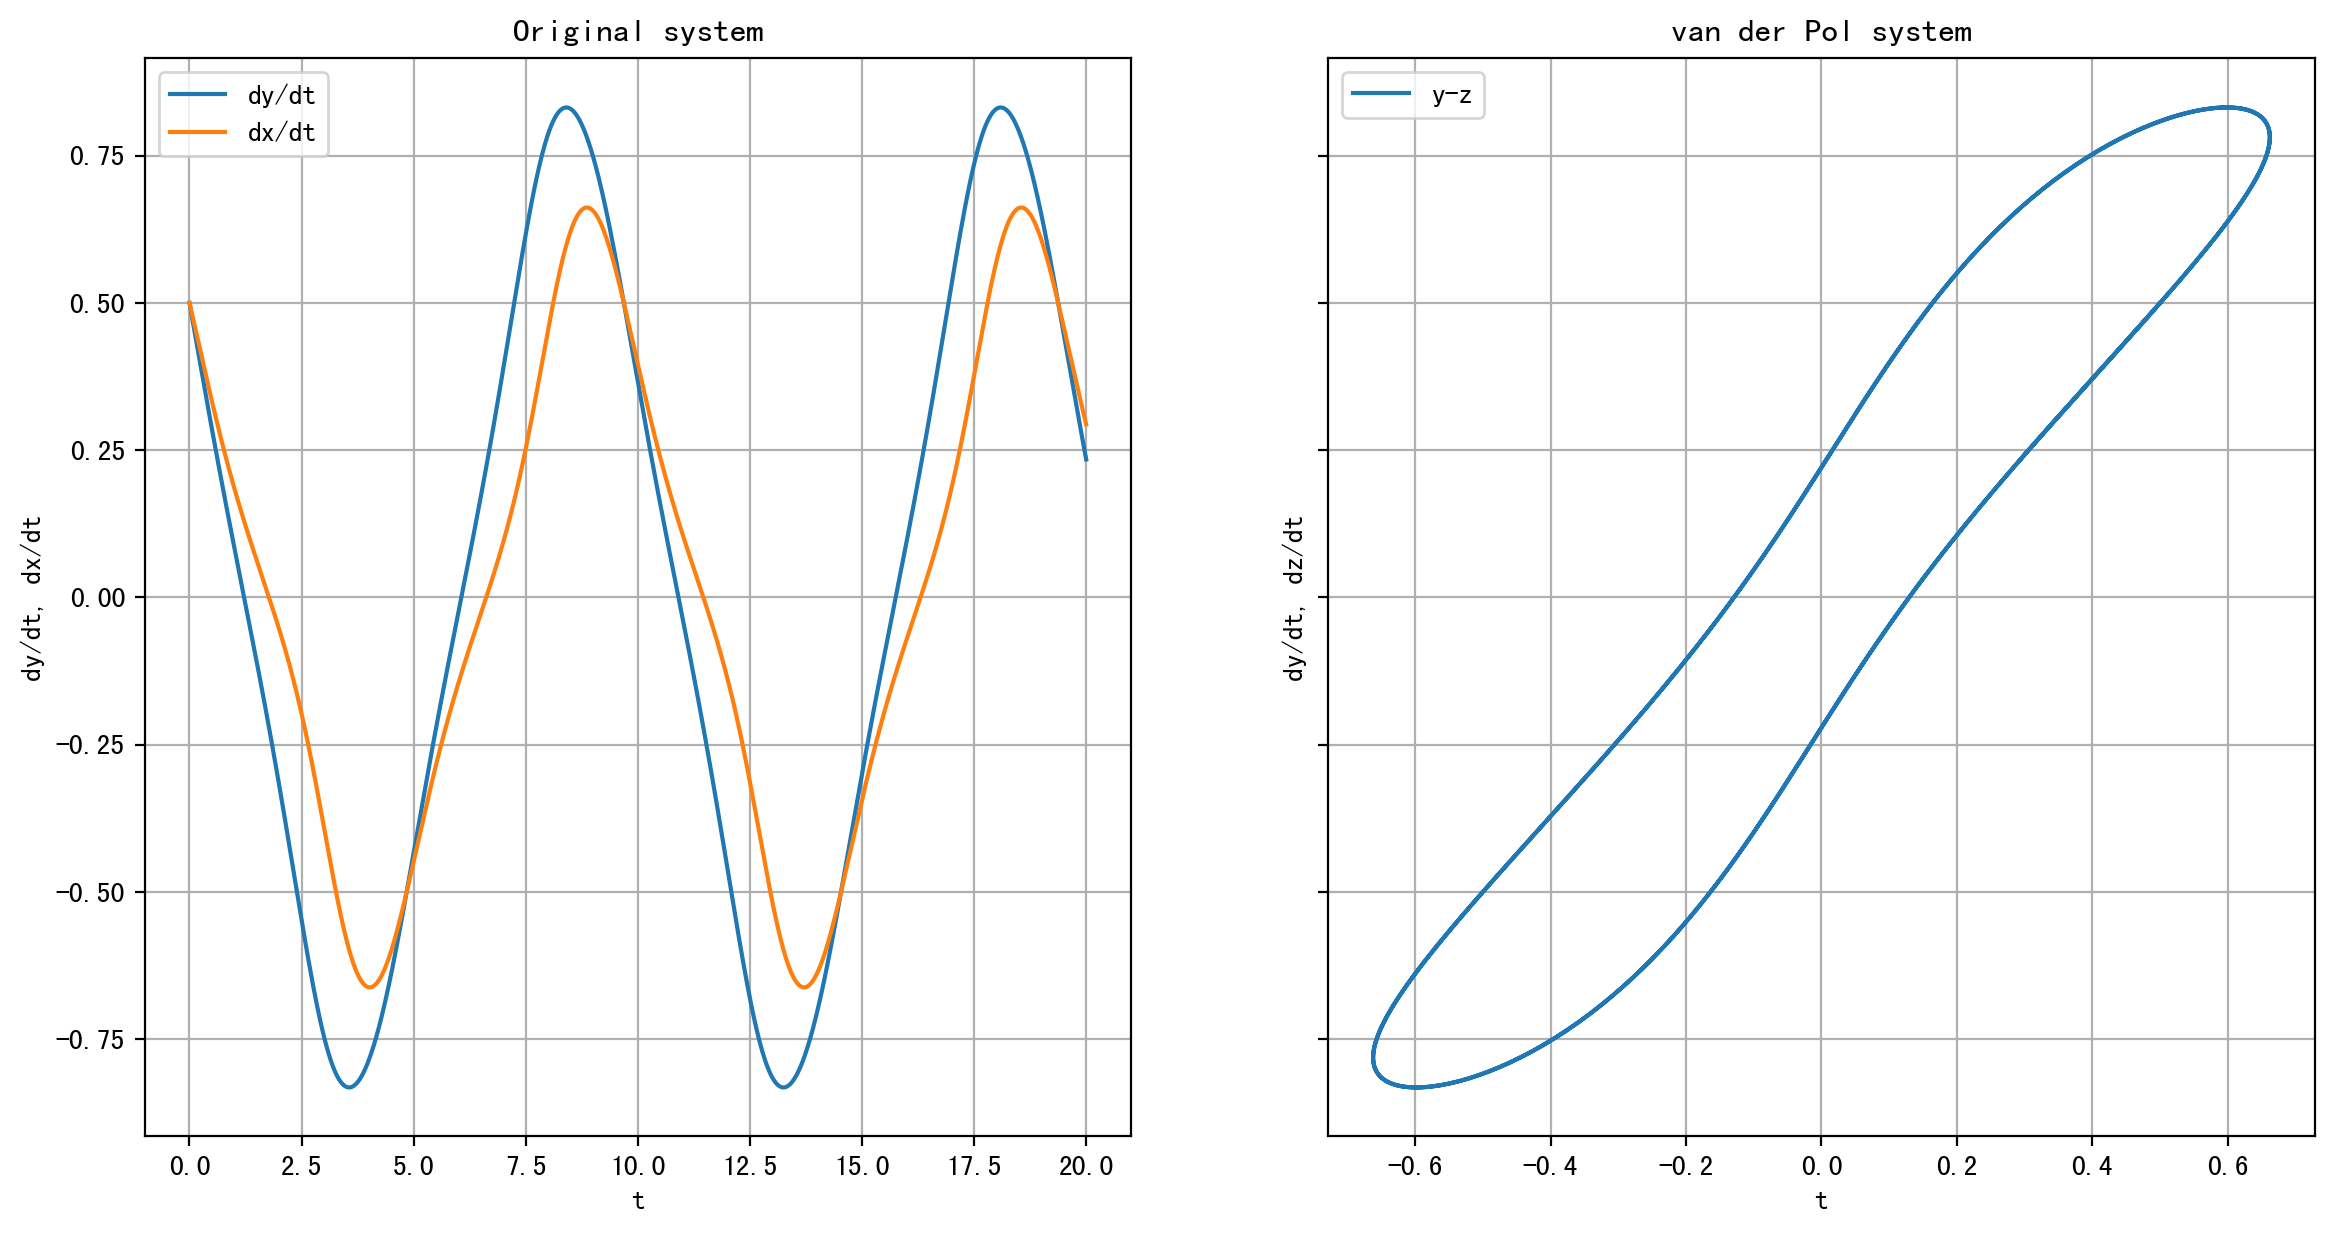

In [8]:
state_ = state_original[0]
variable_index = state_original[1]
t = state_original[2]
y_index, x_index = variable_index.index(y), variable_index.index(x)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
ax1.set_title("Original system")
ax1.plot(t, state_[:, y_index], label="dy/dt")
ax1.plot(t, state_[:, x_index], label="dx/dt")
ax1.legend(loc='best')
ax1.set_xlabel("t")
ax1.set_ylabel("dy/dt, dx/dt")
ax1.grid()

ax2.set_title("van der Pol system")
ax2.plot(state_[:, x_index], state_[:, y_index], label="y-z")
ax2.legend(loc='best')
ax2.set_xlabel("t")
ax2.set_ylabel("dy/dt, dz/dt")
ax2.grid()

In [9]:
system = optimal_inner_quadratization(eq_system)
state_quadratic = system_to_odeint(system[1], t=[0, 20, 1000], initial_state=initial_state)

The Original System is: 


<IPython.core.display.Latex object>

The Optimal Dissipative Quadratization is: 


<IPython.core.display.Latex object>

The new introduced variables are: 


<IPython.core.display.Latex object>

The Optimal Quadratic Dissipative System is (with substitution): 


<IPython.core.display.Latex object>

/Users/yubocai/anaconda3/envs/mlp/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


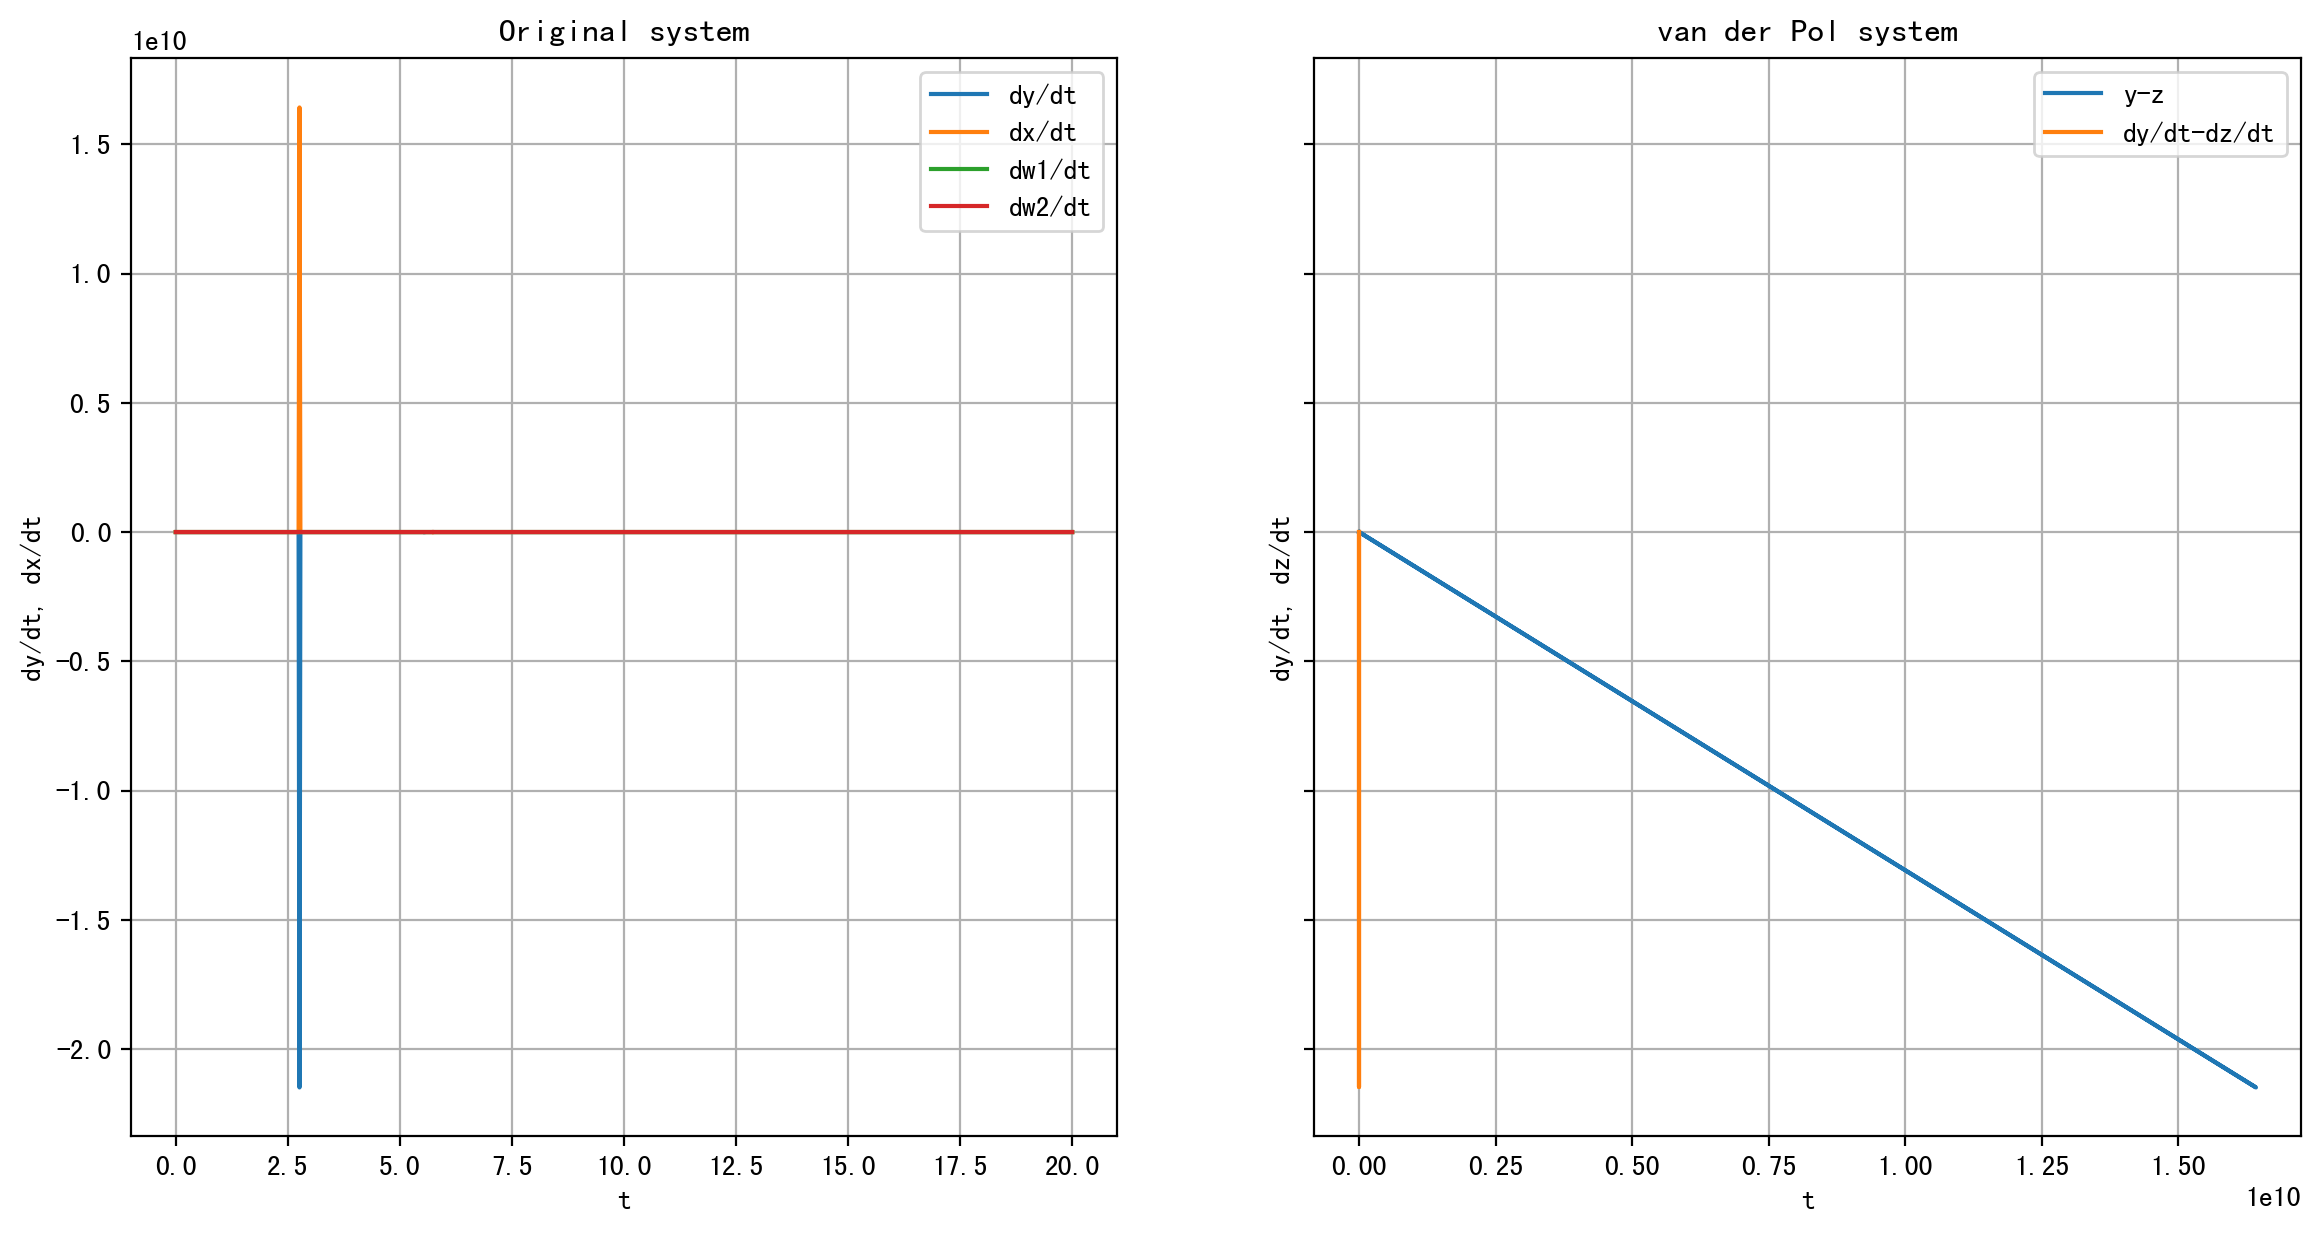

In [10]:
w1, w2 = symbols('w1 w2')
state_ = state_quadratic[0]
variable_index = state_quadratic[1]
t = state_quadratic[2]
y_index, x_index = variable_index.index(y), variable_index.index(x)
w1_index, w2_index = variable_index.index(w1), variable_index.index(w2)
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(14, 7))
ax1.set_title("Original system")
ax1.plot(t, state_[:, y_index], label="dy/dt")
ax1.plot(t, state_[:, x_index], label="dx/dt")
ax1.plot(t, state_[:, w1_index], label="dw1/dt")
ax1.plot(t, state_[:, w2_index], label="dw2/dt")
ax1.legend(loc='best')
ax1.set_xlabel("t")
ax1.set_ylabel("dy/dt, dx/dt")
ax1.grid()

ax2.set_title("van der Pol system")
ax2.plot(state_[:, x_index], state_[:, y_index], label="y-z")
ax2.plot(state_[:, w1_index], state_[:, y_index], label="dy/dt-dz/dt")
ax2.legend(loc='best')
ax2.set_xlabel("t")
ax2.set_ylabel("dy/dt, dz/dt")
ax2.grid()